Hanin Firginita Gilty

# Visualizing the Iris Dataset

**1. Import Libraries**

In [48]:
# Importing multiple library to read,analysed and visualized the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [75]:
# Loading dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**2. Exploratory Data Analysis**

In [76]:
# DataFrame Information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [77]:
# Desciribing Data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
# DataFrame Shape
iris.shape

(150, 5)

In [79]:
# Checking Missing Value
print("Checking Missing Value: ")
iris.isnull().sum()

Checking Missing Value: 


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


**3. Data Visualization Using Various Attributes**

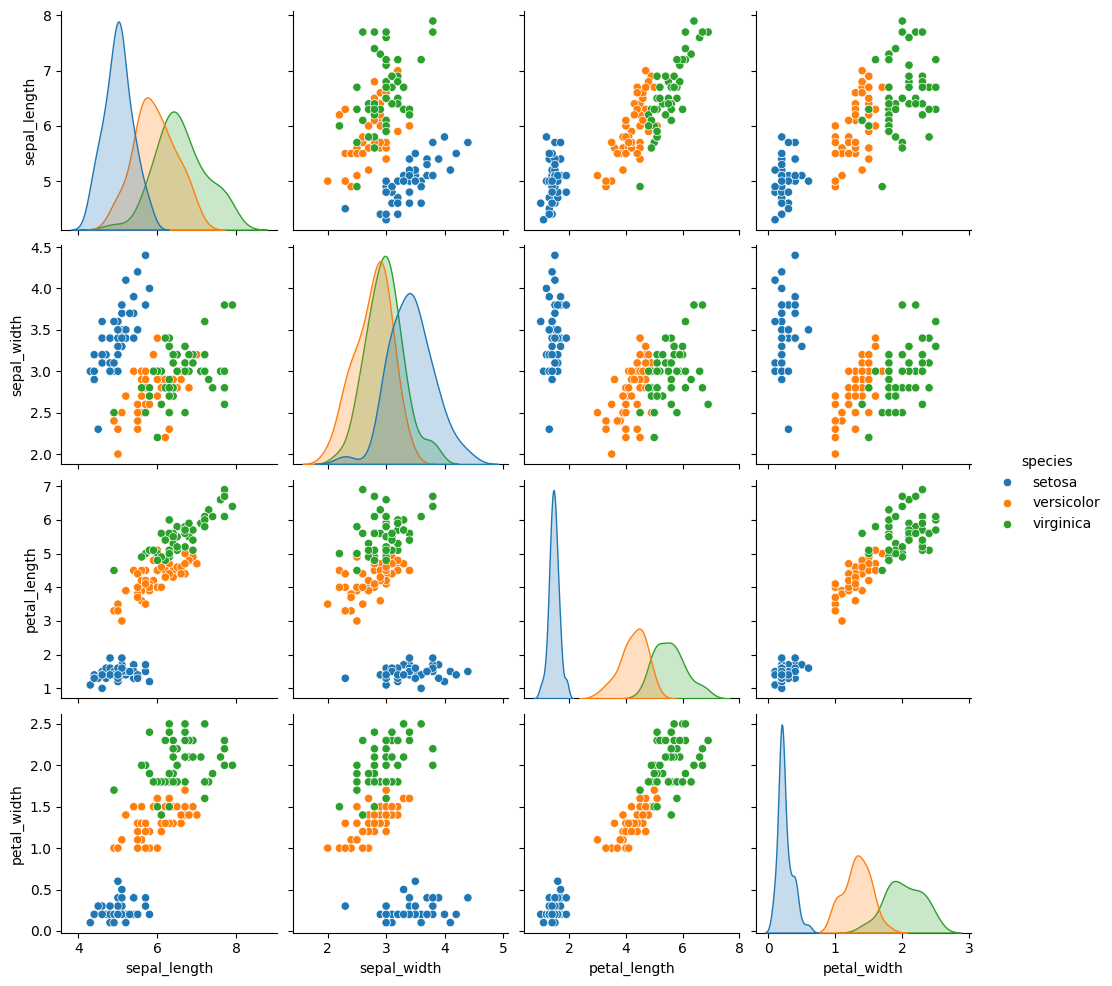

In [80]:
# Plotting all the attributes at once using plot pair
sns.pairplot(data=iris,hue ='species')

<Axes: >

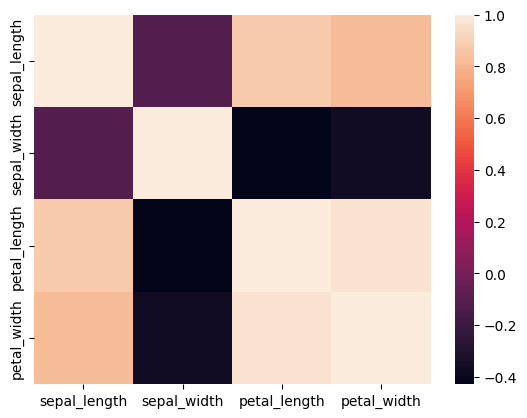

In [81]:
# Plotting the correlation matrix
data = iris.drop(columns=['species']).corr()
sns.heatmap(data)

EDA Insights:
*   Initial exploration provides an understanding of the dataset's structure and quality.
*   Visualization reveals relationships between features and species.



**4. Predicting Target Variable**

In [82]:
# Separating target varibale(y) & feature variables (x)
target = iris['species']
data = iris.copy()
data = data.drop('species',axis =1)

x = data # dependent variable

target # independent variable

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [83]:
# Label encoding as target variable
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
y = target

Feature and Target Separation:
*   Target Variable (y): 'species'
*   Feature Variables (x): All other columns except 'species'.

**5. Training Test Dataset**

In [85]:
# Splitting the data - 80:20 ratio
x_train,x_test,y_train,y_test = train_test_split ( x,y, test_size = 0.2, random_state = 40)

**6. Decision Tree Clasifier**

In [86]:
# Defining the decision tree alogritham
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [87]:
# Predicting values from test data using confusion matrix and classification report.
y_predt = model.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predt))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [88]:
print('Classification report: \n', classification_report(y_test,y_predt))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [89]:
model.feature_importances_

array([0.02919099, 0.        , 0.06433933, 0.90646968])

In [90]:
features = pd.DataFrame(model.feature_importances_,index = x.columns)
features.head()

,0
sepal_length,0.029191
sepal_width,0.000000
petal_length,0.064339
petal_width,0.906470


In [91]:
model2 = DecisionTreeClassifier(criterion ='entropy',ccp_alpha=0.4)

In [92]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.4, criterion='entropy')

In [93]:
y_predt2 = model2.predict(x_test)
print(confusion_matrix(y_test,y_predt2))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


In [94]:
print('Classification report: \n', classification_report(y_test,y_predt2))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [95]:
features2= pd.DataFrame(model2.feature_importances_,index = x.columns)
features2.head()

,0
sepal_length,0.000000
sepal_width,0.000000
petal_length,0.694729
petal_width,0.305271


**7. Visualizing the trained model**

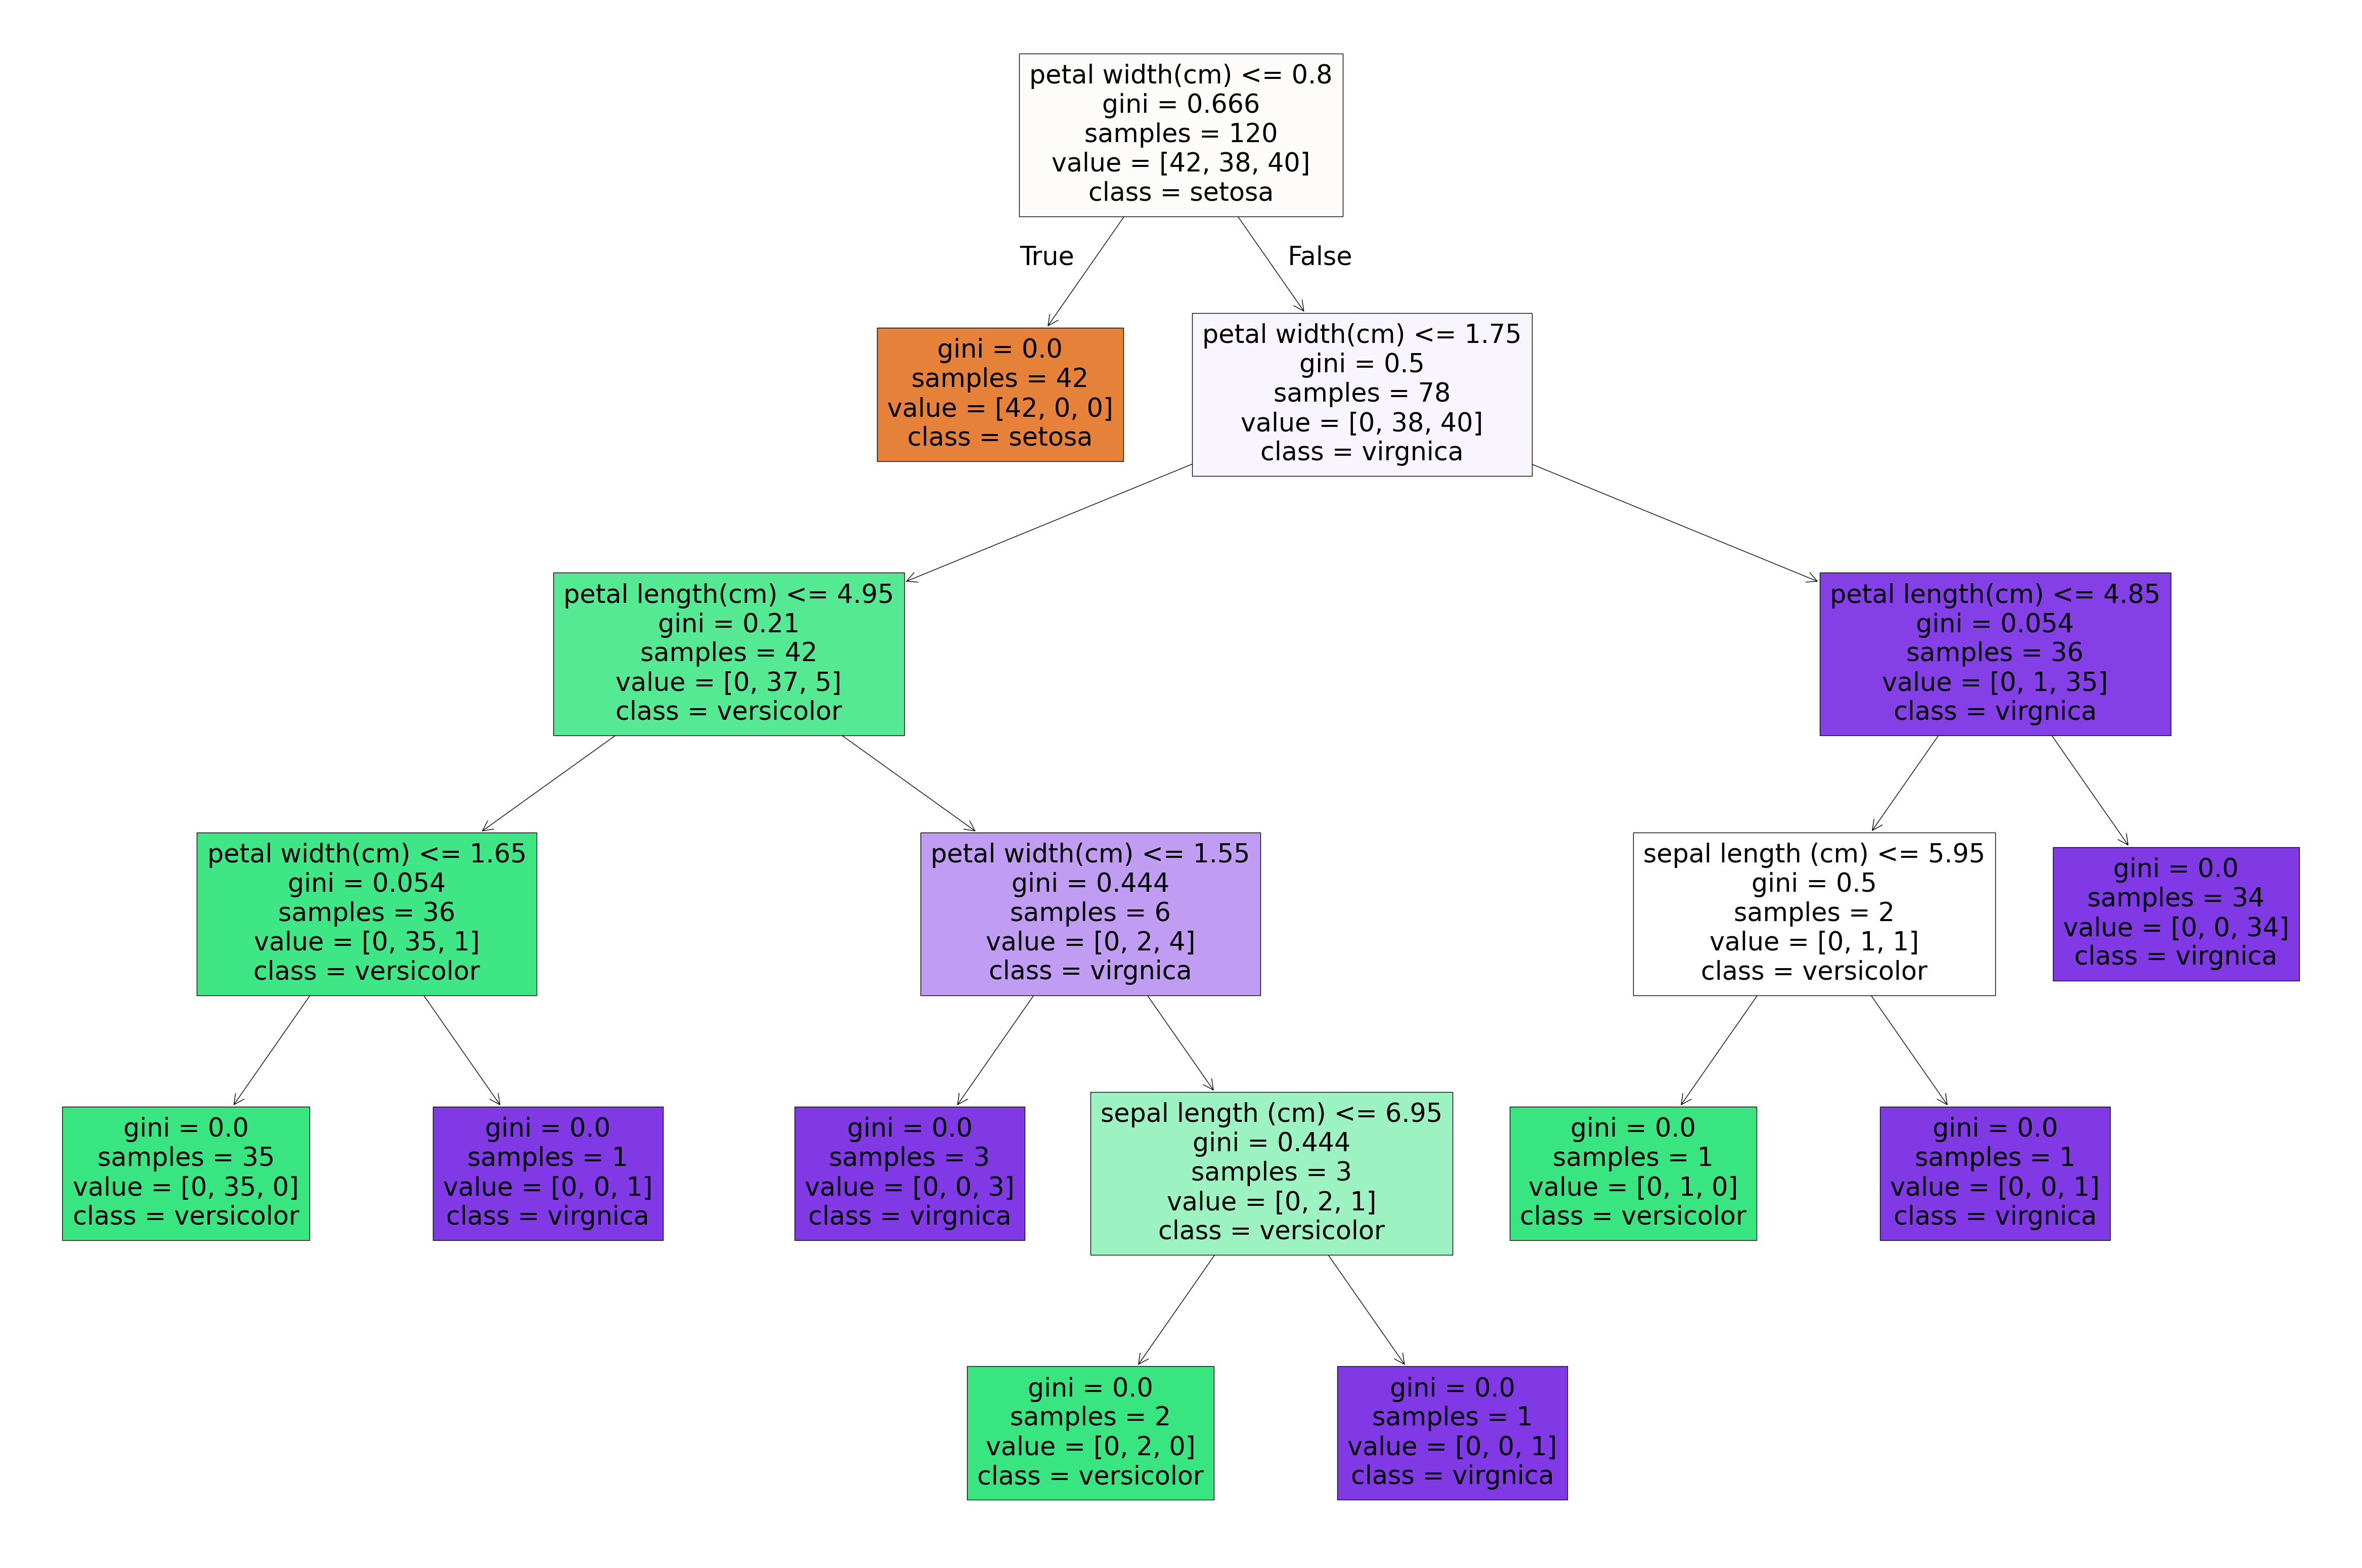

In [96]:
from sklearn import tree
fn = ['sepal length (cm)','sepalwidth (cm)','petal length(cm)','petal width(cm)']
cn =['setosa','versicolor','virgnica']
fig = plt.figure (figsize =(60,40))
tree.plot_tree(model,feature_names = fn,
               class_names = cn ,
               filled = True);
# fig.savefig('imagename.png')

Decision Tree Visualization:
* Feature Names: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
* Class Names: 'setosa', 'versicolor', 'virginica'
* The decision tree is visualized using tree.plot_tree

**8. Checking model accuracy**

In [100]:
# Model Accuracy
import sklearn.metrics as sm
print("Accuracy:",f"{sm.accuracy_score(y_test, y_predt)* 100:.2f}%")

Accuracy: 100.00%


Accuracy Score: The model achieved an accuracy score of 100%, which indicates that all predictions made by the decision tree classifier on the test dataset were correct.